In [116]:
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats, playergamelog, boxscoresummaryv2, boxscoretraditionalv2
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import time
import io


In [ ]:
players_dict = players.get_players()
players_df = pd.DataFrame(players_dict)
players_df[players_df["full_name"] == "Shane Battier"]

,id,full_name,first_name,last_name,is_active
268,2203,Shane Battier,Shane,Battier,False


In [9]:
lame_id = players_df[players_df["full_name"] == "Shane Battier"]["id"].values[0]
lame_id

np.int64(2203)

In [20]:
career = playercareerstats.PlayerCareerStats(player_id=lame_id)
career_stats = career.get_data_frames()[0]
career_stats

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2203,2001-02,00,1610612763,MEM,23.0,78,78,3098,412,...,0.700,180,238,418,216,121,81,155,215,1125
1,2203,2002-03,00,1610612763,MEM,24.0,78,47,2383,275,...,0.828,128,217,345,105,102,88,68,207,756
2,2203,2003-04,00,1610612763,MEM,25.0,79,1,1946,242,...,0.732,102,201,303,101,101,58,56,187,669
3,2203,2004-05,00,1610612763,MEM,26.0,80,72,2516,271,...,0.789,158,255,413,126,91,77,75,201,792
4,2203,2005-06,00,1610612763,MEM,27.0,81,81,2839,303,...,0.707,164,265,429,136,92,114,90,223,818
5,2203,2006-07,00,1610612745,HOU,28.0,82,82,2988,292,...,0.779,67,271,338,175,79,60,72,190,829
6,2203,2007-08,00,1610612745,HOU,29.0,80,78,2907,265,...,0.743,131,276,407,155,77,90,78,196,744
7,2203,2008-09,00,1610612745,HOU,30.0,60,59,2031,145,...,0.821,52,233,285,137,48,54,49,114,436
8,2203,2009-10,00,1610612745,HOU,31.0,67,62,2168,178,...,0.726,74,238,312,164,53,76,64,139,534
9,2203,2010-11,00,1610612745,HOU,32.0,59,59,1818,186,...,0.645,58,223,281,153,53,71,63,127,509


In [28]:
gamelog = playergamelog.PlayerGameLog(lame_id, season="2002-03")
gamelog_df = gamelog.get_data_frames()[0]

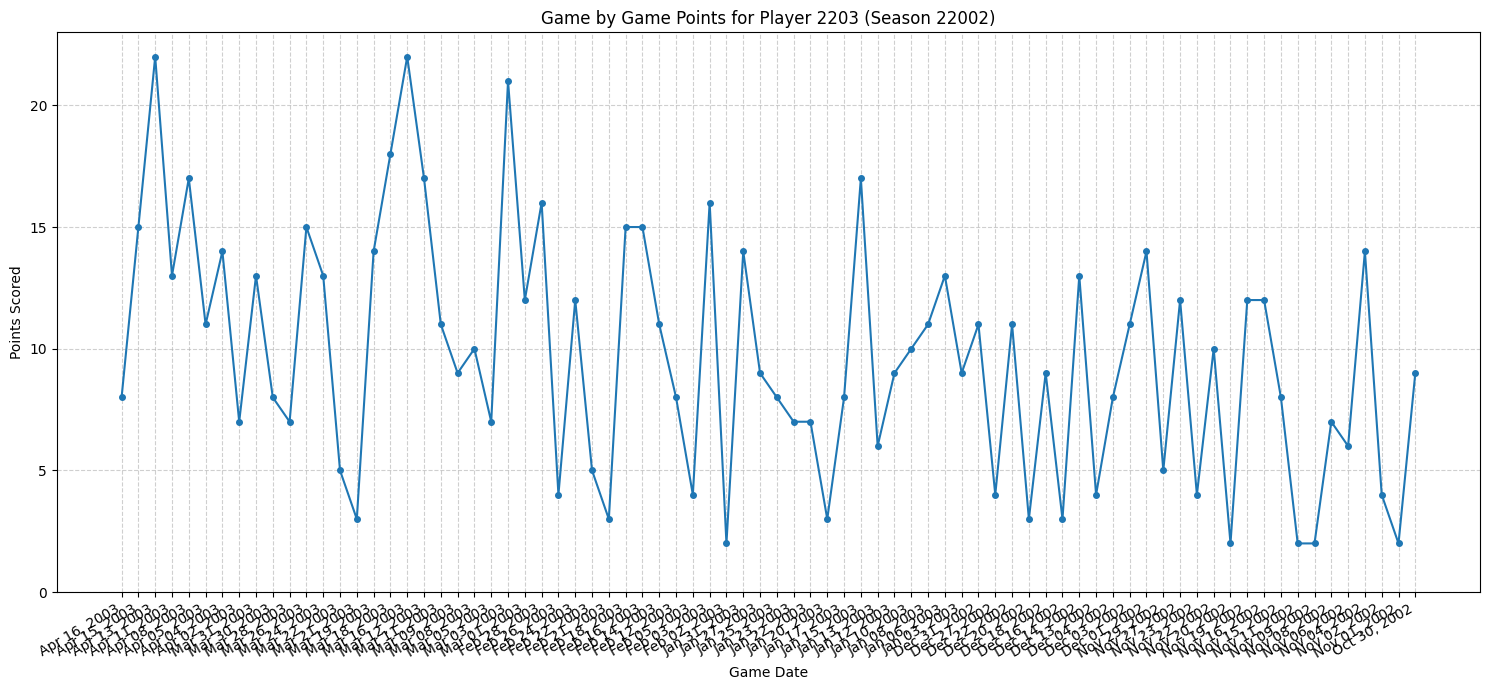

In [31]:
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the data on the axes
# We pass 'GAME_DATE' as the x-axis and 'PTS' as the y-axis.
# `marker='o'` adds a small circle at each data point (game).
# `linestyle='-'` connects the markers with a line.
# `markersize=4` makes the circles a bit smaller.
ax.plot(gamelog_df['GAME_DATE'], gamelog_df['PTS'], marker='o', linestyle='-', markersize=4)

# --- 4. Customize the Plot ---

# Set the title and labels
player_id = gamelog_df['Player_ID'].iloc[0] # Get the player ID from the first row
season_id = gamelog_df['SEASON_ID'].iloc[0] # Get the season ID
ax.set_title(f"Game by Game Points for Player {player_id} (Season {season_id})")
ax.set_xlabel("Game Date")
ax.set_ylabel("Points Scored")

# # Format the x-axis (dates)
# # We need to tell matplotlib how to format and place the date ticks.

# # Use a major locator to automatically find good intervals for date ticks
# # (e.g., every week, every month) so they don't overlap.
# locator = mdates.AutoDateLocator()
# ax.xaxis.set_major_locator(locator)

# # Use a formatter to display the dates as 'YYYY-MM-DD'
# formatter = mdates.DateFormatter('%Y-%m-%d')
# ax.xaxis.set_major_formatter(formatter)

# Automatically rotate the date labels on the x-axis to make them readable
fig.autofmt_xdate()

# Add a grid to the plot for easier reading
ax.grid(True, linestyle='--', alpha=0.6)

# Set the y-axis to start at 0
ax.set_ylim(bottom=0)

# Adjust the plot layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()

In [33]:
giannis_id = players_df[players_df["full_name"] == "Giannis Antetokounmpo"]["id"].values[0]
giannis_id

np.int64(203507)

In [68]:
pd.set_option('display.max_columns', None)
giannis_gamelog = playergamelog.PlayerGameLog(giannis_id, season="2024-25")
g_gamelog_df = giannis_gamelog.get_data_frames()[0]
g_gamelog_df

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22024,203507,0022401171,"Apr 11, 2025",MIL @ DET,W,38,11,22,0.500,0,2,0.0,10,11,0.909,1,10,11,15,1,2,3,0,32,22,1
1,22024,203507,0022401161,"Apr 10, 2025",MIL vs. NOP,W,26,11,17,0.647,1,2,0.5,5,10,0.500,2,9,11,5,0,1,0,1,28,6,1
2,22024,203507,0022401152,"Apr 08, 2025",MIL vs. MIN,W,38,9,15,0.600,1,2,0.5,4,11,0.364,3,10,13,10,1,1,0,0,23,26,1
3,22024,203507,0022401131,"Apr 05, 2025",MIL @ MIA,W,43,13,21,0.619,0,1,0.0,10,14,0.714,0,15,15,10,0,1,3,1,36,17,1
4,22024,203507,0022401115,"Apr 03, 2025",MIL @ PHI,W,39,12,19,0.632,1,1,1.0,10,11,0.909,2,15,17,20,2,0,2,0,35,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,22024,203507,0022400128,"Oct 31, 2024",MIL @ MEM,L,34,17,22,0.773,0,0,0.0,3,8,0.375,1,10,11,4,1,1,1,4,37,0,1
63,22024,203507,0022400104,"Oct 28, 2024",MIL @ BOS,L,39,14,26,0.538,0,2,0.0,2,6,0.333,1,9,10,6,0,0,7,4,30,-19,1
64,22024,203507,0022400098,"Oct 27, 2024",MIL @ BKN,L,33,7,11,0.636,0,0,0.0,8,11,0.727,1,11,12,7,1,1,4,3,22,-11,1
65,22024,203507,0022400083,"Oct 25, 2024",MIL vs. CHI,L,35,15,23,0.652,0,1,0.0,8,16,0.500,1,10,11,5,0,0,3,1,38,-12,1


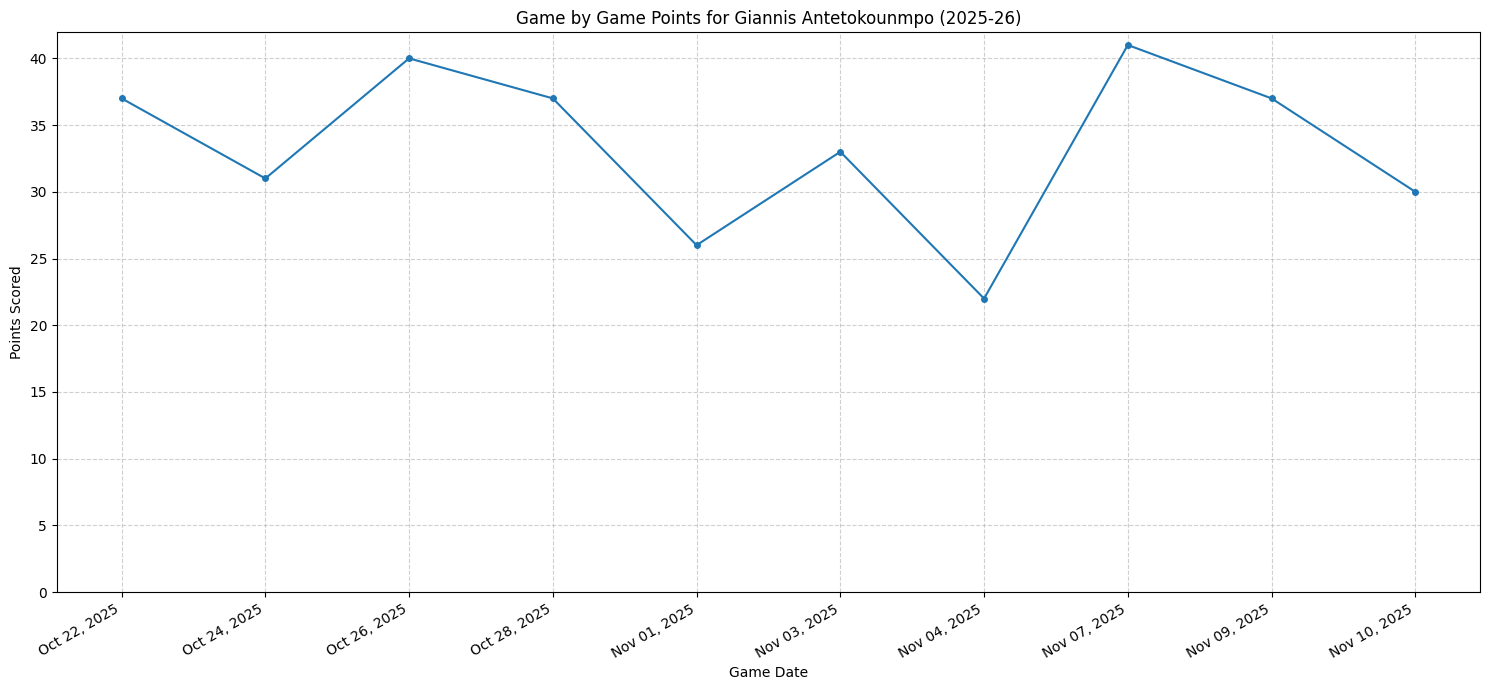

In [39]:
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the data on the axes
# We pass 'GAME_DATE' as the x-axis and 'PTS' as the y-axis.
# `marker='o'` adds a small circle at each data point (game).
# `linestyle='-'` connects the markers with a line.
# `markersize=4` makes the circles a bit smaller.
ax.plot(g_gamelog_df['GAME_DATE'], g_gamelog_df['PTS'], marker='o', linestyle='-', markersize=4)

# --- 4. Customize the Plot ---

# Set the title and labels
player_id = g_gamelog_df['Player_ID'].iloc[0] # Get the player ID from the first row
season_id = g_gamelog_df['SEASON_ID'].iloc[0] # Get the season ID
ax.set_title(f"Game by Game Points for Giannis Antetokounmpo (2025-26)")
ax.set_xlabel("Game Date")
ax.set_ylabel("Points Scored")

# # Format the x-axis (dates)
# # We need to tell matplotlib how to format and place the date ticks.

# # Use a major locator to automatically find good intervals for date ticks
# # (e.g., every week, every month) so they don't overlap.
# locator = mdates.AutoDateLocator()
# ax.xaxis.set_major_locator(locator)

# # Use a formatter to display the dates as 'YYYY-MM-DD'
# formatter = mdates.DateFormatter('%Y-%m-%d')
# ax.xaxis.set_major_formatter(formatter)

# Automatically rotate the date labels on the x-axis to make them readable
fig.autofmt_xdate()

# Add a grid to the plot for easier reading
ax.grid(True, linestyle='--', alpha=0.6)

# Set the y-axis to start at 0
ax.set_ylim(bottom=0)

ax.invert_xaxis()

# Adjust the plot layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()

In [122]:
game_id = '0022401115'
game_summary = boxscoresummaryv2.BoxScoreSummaryV2(game_id=game_id)

winloss_dataframe = game_summary.get_data_frames()[5]
winloss_dataframe[winloss_dataframe["TEAM_NICKNAME"] != "Bucks"]["TEAM_WINS_LOSSES"].values[0]

/var/folders/yq/tt9b5v356sb53djv8bfvb6km0000gn/T/ipykernel_91164/3828235581.py:2: UserWarning: BoxScoreSummaryV2 has known data availability issues. Data may be missing for games on or after 4/10/2025. Users should moving to BoxScoreSummaryV3 or verify data completeness for their specific use cases and implement appropriate error handling.
  game_summary = boxscoresummaryv2.BoxScoreSummaryV2(game_id=game_id)


'23-54'

In [99]:
def winLossToPctg(win_loss_str):
    wins, losses = win_loss_str.split("-")
    wins = int(wins)
    losses = int(losses)

    return wins / (wins + losses)

In [124]:
def addWinPercentage(game_id):
    print(game_id)
    time.sleep(0.6)

    game_summary = boxscoresummaryv2.BoxScoreSummaryV2(game_id=game_id)
    print("Loaded game summary")
    winloss_dataframe = game_summary.get_data_frames()[5]
    opp_row = winloss_dataframe[winloss_dataframe["TEAM_NICKNAME"] != "Bucks"]

    winloss = opp_row["TEAM_WINS_LOSSES"].values[0]
    print(winloss)
    if winloss is not None:
        return winLossToPctg(winloss)
    else:
        return np.nan
    

game_summary = boxscoresummaryv2.BoxScoreSummaryV2(game_id="0022401171")

In [125]:
g_gamelog_df['opp_win_percentage'] = g_gamelog_df['Game_ID'].apply(addWinPercentage)
g_gamelog_df

0022401171


/var/folders/yq/tt9b5v356sb53djv8bfvb6km0000gn/T/ipykernel_91164/2134918494.py:5: UserWarning: BoxScoreSummaryV2 has known data availability issues. Data may be missing for games on or after 4/10/2025. Users should moving to BoxScoreSummaryV3 or verify data completeness for their specific use cases and implement appropriate error handling.
  game_summary = boxscoresummaryv2.BoxScoreSummaryV2(game_id=game_id)


Loaded game summary
None
0022401161


/var/folders/yq/tt9b5v356sb53djv8bfvb6km0000gn/T/ipykernel_91164/2134918494.py:5: UserWarning: BoxScoreSummaryV2 has known data availability issues. Data may be missing for games on or after 4/10/2025. Users should moving to BoxScoreSummaryV3 or verify data completeness for their specific use cases and implement appropriate error handling.
  game_summary = boxscoresummaryv2.BoxScoreSummaryV2(game_id=game_id)


Loaded game summary
None
0022401152


/var/folders/yq/tt9b5v356sb53djv8bfvb6km0000gn/T/ipykernel_91164/2134918494.py:5: UserWarning: BoxScoreSummaryV2 has known data availability issues. Data may be missing for games on or after 4/10/2025. Users should moving to BoxScoreSummaryV3 or verify data completeness for their specific use cases and implement appropriate error handling.
  game_summary = boxscoresummaryv2.BoxScoreSummaryV2(game_id=game_id)


Loaded game summary
46-33
0022401131
Loaded game summary
35-43
0022401115
Loaded game summary
23-54
0022401101
Loaded game summary
35-41
0022401083
Loaded game summary
36-38
0022401070
Loaded game summary
46-27
0022401043
Loaded game summary
35-37
0022401027
Loaded game summary
35-35
0022400996
Loaded game summary
43-26
0022401012
Loaded game summary
40-29
0022400982
Loaded game summary
56-12
0022400972
Loaded game summary
37-29
0022400955
Loaded game summary
40-24
0022400942
Loaded game summary
36-28
0022400922
Loaded game summary
54-10
0022400917
Loaded game summary
30-35
0022400897
Loaded game summary
32-31
0022400884
Loaded game summary
28-34
0022400865
Loaded game summary
32-29
0022400846
Loaded game summary
38-21
0022400831
Loaded game summary
36-22
0022400817
Loaded game summary
26-29
0022400799
Loaded game summary
9-46
0022400793
Loaded game summary
31-24
0022400699
Loaded game summary
33-16
0022400684
Loaded game summary
21-24
0022400662
Loaded game summary
18-29
0022400658
Lo

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,opp_win_percentage
0,22024,203507,0022401171,"Apr 11, 2025",MIL @ DET,W,38,11,22,0.500,0,2,0.0,10,11,0.909,1,10,11,15,1,2,3,0,32,22,1,NaN
1,22024,203507,0022401161,"Apr 10, 2025",MIL vs. NOP,W,26,11,17,0.647,1,2,0.5,5,10,0.500,2,9,11,5,0,1,0,1,28,6,1,NaN
2,22024,203507,0022401152,"Apr 08, 2025",MIL vs. MIN,W,38,9,15,0.600,1,2,0.5,4,11,0.364,3,10,13,10,1,1,0,0,23,26,1,0.582278
3,22024,203507,0022401131,"Apr 05, 2025",MIL @ MIA,W,43,13,21,0.619,0,1,0.0,10,14,0.714,0,15,15,10,0,1,3,1,36,17,1,0.448718
4,22024,203507,0022401115,"Apr 03, 2025",MIL @ PHI,W,39,12,19,0.632,1,1,1.0,10,11,0.909,2,15,17,20,2,0,2,0,35,23,1,0.298701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,22024,203507,0022400128,"Oct 31, 2024",MIL @ MEM,L,34,17,22,0.773,0,0,0.0,3,8,0.375,1,10,11,4,1,1,1,4,37,0,1,0.500000
63,22024,203507,0022400104,"Oct 28, 2024",MIL @ BOS,L,39,14,26,0.538,0,2,0.0,2,6,0.333,1,9,10,6,0,0,7,4,30,-19,1,1.000000
64,22024,203507,0022400098,"Oct 27, 2024",MIL @ BKN,L,33,7,11,0.636,0,0,0.0,8,11,0.727,1,11,12,7,1,1,4,3,22,-11,1,0.333333
65,22024,203507,0022400083,"Oct 25, 2024",MIL vs. CHI,L,35,15,23,0.652,0,1,0.0,8,16,0.500,1,10,11,5,0,0,3,1,38,-12,1,0.500000


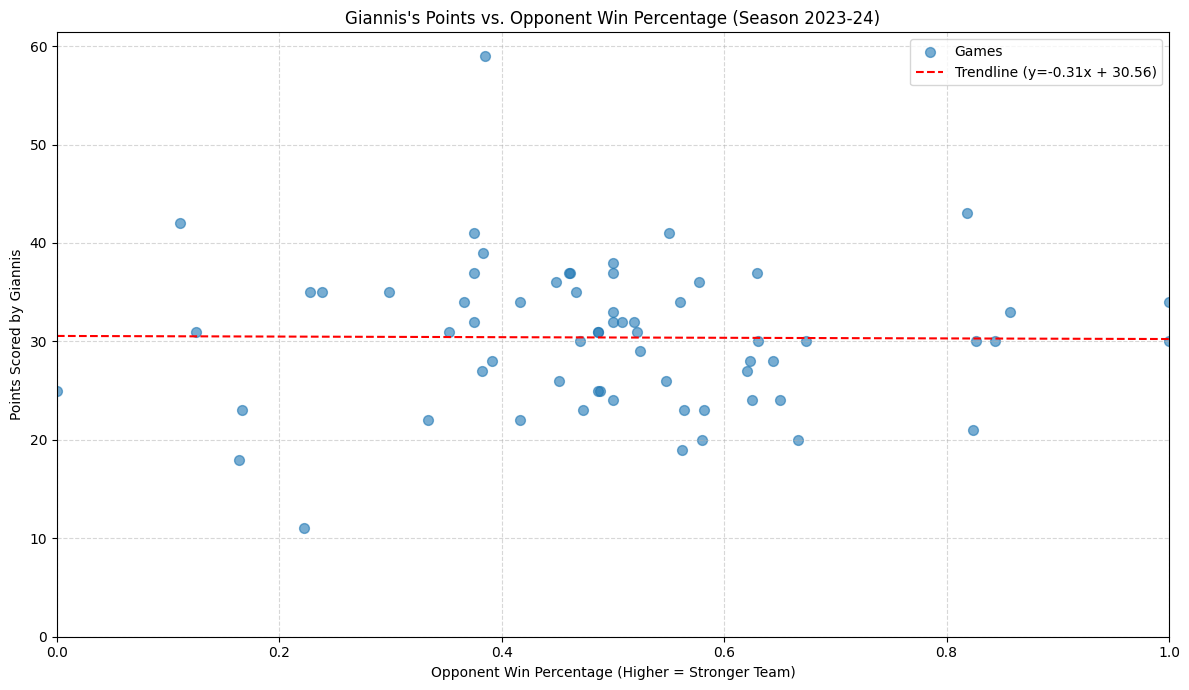

In [126]:
plot_df = g_gamelog_df[['opp_win_percentage', 'PTS']].dropna()

# Get the x and y data
x_data = plot_df['opp_win_percentage']
y_data = plot_df['PTS']

# --- 2. Create the Plot ---
# Create a Figure and Axes object
fig, ax = plt.subplots(figsize=(12, 7))

# Create the scatter plot
# `alpha=0.6` adds transparency to see overlapping points
ax.scatter(x_data, y_data, alpha=0.6, s=50, label='Games')

# --- 3. Add Trendline (Linear Regression) ---
# This is the "value-add" part.
# np.polyfit() calculates a 1st-degree (linear) fit.
# It returns the slope (m) and y-intercept (b) of the line.
m, b = np.polyfit(x_data, y_data, 1)

# Create the x-values for the trendline
# We just need the min and max of our x-data to draw a line
x_trend = np.array([x_data.min(), x_data.max()])

# Calculate the y-values for the trendline using y = mx + b
y_trend = m * x_trend + b

# Plot the trendline on the same axes
ax.plot(x_trend, y_trend, color='red', linestyle='--', 
        label=f'Trendline (y={m:.2f}x + {b:.2f})')

# --- 4. Customize the Plot ---
# Set the title and labels
ax.set_title(f"Giannis's Points vs. Opponent Win Percentage (Season 2023-24)")
ax.set_xlabel("Opponent Win Percentage (Higher = Stronger Team)")
ax.set_ylabel("Points Scored by Giannis")

# Set axis limits for clarity. Win Pct is always 0 to 1.
ax.set_xlim(0, 1)
ax.set_ylim(bottom=0)

# Add a grid and a legend
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()

# Ensure all elements fit
plt.tight_layout()

# Display the plot
plt.show()